In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
# from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit



In [6]:
exercise_data = "raw-data-kaggle.csv"
running_data_frame = pd.read_csv(exercise_data, delimiter= ";") 

# running_data_frame.dropna(inplace=True) # want to get rid of any NA values, can't make graphs out of NA values 

running_data_frame.dropna(subset=["average heart rate (bpm)", "elapsed time (s)", "distance (m)" ], inplace=True)


running_data_frame

,athlete,gender,timestamp,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm)
0,18042525,M,15/12/2019 09:08,2965.8,812,17.4,150.3
1,18042525,M,10/12/2019 19:27,10020.8,3290,52.2,160.8
2,18042525,M,03/12/2019 19:46,12132.2,4027,249.0,148.9
3,18042525,M,26/11/2019 19:46,11631.5,4442,194.0,136.2
4,18042525,M,19/11/2019 19:45,11708.1,4022,250.7,146.0
...,...,...,...,...,...,...,...
42111,27950722,F,17/11/2017 17:48,5790.2,2242,19.5,151.0
42112,27950722,F,14/11/2017 18:02,6452.9,2398,19.2,142.0
42113,27950722,F,12/11/2017 09:48,12271.2,5334,203.0,153.5
42114,27950722,F,10/11/2017 18:06,7057.4,2592,25.1,138.8


We want to account for different genders, so we split our original dataframe into two separate ones. 

In [7]:
gender_group_data = running_data_frame.groupby("gender")

male_data = gender_group_data.get_group("M")

female_data = gender_group_data.get_group("F")


Let's take a look at each dataframe with the describe() function 

In [8]:
invalid_rows = male_data.index[male_data.isin([0, np.inf]).any(axis = 1)]

male_data = male_data.drop(invalid_rows)

print(f" the shape of the male dataframe is: {male_data.shape}") 


# Calculate average pace in miles per minute
male_data['average pace (miles / min)'] = (male_data['elapsed time (s)'] / 60) / (male_data['distance (m)'] / 1609.34) # convert seconds to mins and meters to miles

male_data.describe().drop("athlete", axis = 1) # athlete is a categorical not quantitative

 the shape of the male dataframe is: (17885, 7)


,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),average pace (miles / min)
count,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000
mean,11635.361521,4259.785351,253.074107,146.632206,9.583241
std,6879.008955,3553.546109,438.574374,16.377942,3.082652
min,47.200000,10.000000,1.000000,36.900000,0.282934
25%,8066.300000,2652.000000,38.000000,137.300000,8.070398
50%,10683.000000,3535.000000,92.000000,147.100000,8.858077
75%,13708.100000,4679.000000,257.000000,156.600000,9.918856
max,218950.000000,96372.000000,9729.000000,237.000000,77.821023


In [9]:
invalid_rows = female_data.index[female_data.isin([0, np.inf]).any(axis = 1)] # I can't use 0s really, especially not 0s in distance n / 0 = DNE

female_data = female_data.drop(invalid_rows)

print(f" the shape of the female dataframe is: {female_data.shape}") 

# Calculate average pace in miles per minute
female_data['average pace (miles / min)'] = (female_data['elapsed time (s)'] / 60) / (female_data['distance (m)'] / 1609.34) # convert seconds to mins and meters to miles

female_data.describe().drop("athlete", axis = 1) # athlete is still not meaningful

 the shape of the female dataframe is: (4365, 7)


,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),average pace (miles / min)
count,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000
mean,10482.614066,4182.217411,197.874158,153.972371,10.570557
std,6289.093979,3319.972791,389.490402,14.174523,3.406561
min,105.000000,114.000000,2.000000,72.000000,1.285649
25%,7100.600000,2685.000000,35.200000,145.300000,9.201122
50%,9628.500000,3540.000000,83.300000,154.400000,9.827859
75%,12092.300000,4592.000000,197.000000,163.700000,10.791689
max,90281.000000,55226.000000,11128.000000,196.300000,114.873315


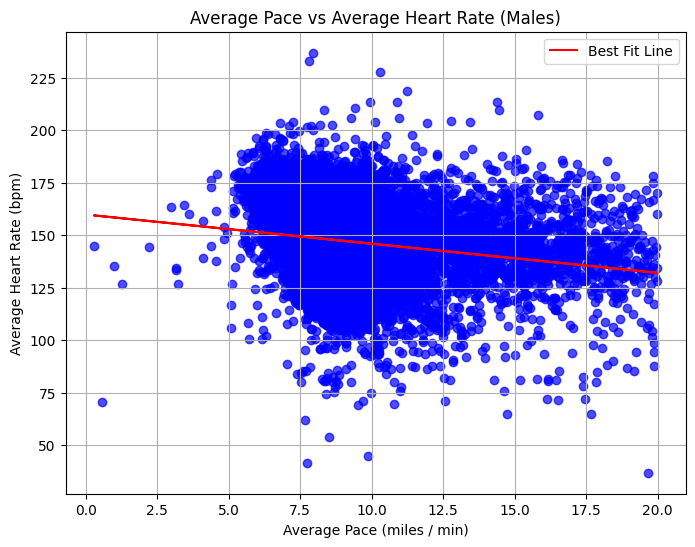

the average pace is: 9.583240545063045
The best fit line is -1.3879786907495584x + 159.88667781131127


In [12]:
# male_data.head()

# Define the maximum allowable pace (miles / min)
max_allowable_pace = 20 # For instance, setting the maximum pace (miles / min)

# Filter the data based on the defined maximum pace
filtered_data = male_data[male_data['average pace (miles / min)'] <= max_allowable_pace]

x_data = filtered_data['average pace (miles / min)'].values
y_data = filtered_data['average heart rate (bpm)'].values

def linear_func(x, a, b):
    return a * x + b

# Fit the curve using curve_fit
params, covariance = curve_fit(linear_func, x_data, y_data)

# Get the optimized parameters
a, b = params

# Calculate the mean of the average pace col
average_pace = male_data['average pace (miles / min)'].mean(skipna=True)

male_data


### PLOTTING ###


# Scatter plot with filtered data
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['average pace (miles / min)'], filtered_data['average heart rate (bpm)'],
            color='blue', alpha=0.7)
plt.title('Average Pace vs Average Heart Rate (Males)')
plt.xlabel('Average Pace (miles / min)')
plt.ylabel('Average Heart Rate (bpm)')
plt.grid(True)

plt.plot(x_data, linear_func(x_data, a, b), color='red', label='Best Fit Line')

plt.legend()
plt.show()

print(f"the average pace is: {male_data['average pace (miles / min)'].mean(skipna=True)}")
print(f"The best fit line is {a}x + {b}")

# this equation represents how we predict what the bpm of someone's heart is going to be depending on the run they do
# negative correlation -> makes sense
# x values = average pace, so someone enters the average pace and then we just plug that x into this equation to find the bpm of a song 


made a graph w/ regression line  for MALES

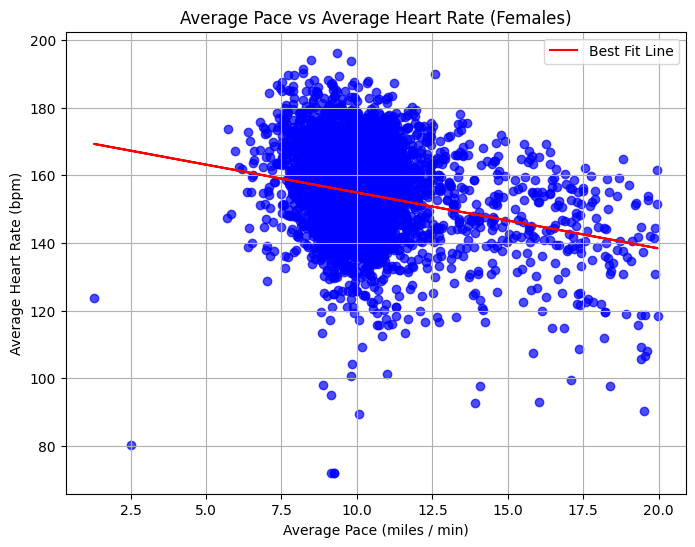

the average pace is: 9.583240545063045
The best fit line is -1.6532179784683314x + 171.44424342083707


In [13]:
# male_data.head()

# Define the maximum allowable pace (miles / min)
max_allowable_pace = 20 # For instance, setting the maximum pace (miles / min)

# Filter the data based on the defined maximum pace
filtered_data = female_data[female_data['average pace (miles / min)'] <= max_allowable_pace]

x_data = filtered_data['average pace (miles / min)'].values
y_data = filtered_data['average heart rate (bpm)'].values

def linear_func(x, a, b):
    return a * x + b

# Fit the curve using curve_fit
params, covariance = curve_fit(linear_func, x_data, y_data)

# Get the optimized parameters
a, b = params

# Calculate the mean of the average pace col
average_pace = female_data['average pace (miles / min)'].mean(skipna=True)

female_data


### PLOTTING ###


# Scatter plot with filtered data
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['average pace (miles / min)'], filtered_data['average heart rate (bpm)'],
            color='blue', alpha=0.7)
plt.title('Average Pace vs Average Heart Rate (Females)')
plt.xlabel('Average Pace (miles / min)')
plt.ylabel('Average Heart Rate (bpm)')
plt.grid(True)

plt.plot(x_data, linear_func(x_data, a, b), color='red', label='Best Fit Line')

plt.legend()
plt.show()

print(f"the average pace is: {male_data['average pace (miles / min)'].mean(skipna=True)}")
print(f"The best fit line is {a}x + {b}")

made a graph w/ regression line  for FEMALES